### Import necessary libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# File system manangement
import os

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report


# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

### Inspect the data

In [5]:
# Training Data
train = pd.read_excel(r"C:\Users\ninaj\Documents\Data-Driven Design Y2\Graduation Project\PHASE 2\Week 5\LR\labelled_products_bought.xlsx")
print('Training data shape: ', train.shape)
train.head()

Training data shape:  (3399, 16)


,Unnamed: 0,Title,Nutri-Score,Description,Price,Price_cat,BIO,Low_sugar,Low_fat,Plant_based,Glutenfree,Fairtrade,UTZ,Vegan,Vegetarian,Bought
0,0,AH Komkommer,Nutri-Score A,Komkommer,0.95,Low budget,0,0,0,0,0,0,0,0,0,0
1,1,AH Bananen,Nutri-Score A,Bananen°°Rainforest Alliance gecertificeerd. Z...,1.39,Low budget,0,0,0,0,0,0,0,0,0,0
2,2,AH Mandarijnen,Nutri-Score A,Mandarijnen,2.39,Medium budget,0,0,0,0,0,0,0,0,0,0
3,3,AH Courgette,Nutri-Score A,Courgette,1.09,Low budget,0,0,0,0,0,0,0,0,0,0
4,4,AH Broccoli,Nutri-Score A,Broccoli - Klasse 1,1.25,Low budget,0,0,0,0,0,0,0,0,0,0


In [6]:
# Test data
test = pd.read_excel(r"C:\Users\ninaj\Documents\Data-Driven Design Y2\Graduation Project\PHASE 2\Week 5\LR\selected_products.xlsx")
print('Testing data shape: ', test.shape)
test.head()

Testing data shape:  (182, 15)


,Unnamed: 0,Title,Nutri-Score,Description,Price,Price_cat,BIO,Low_sugar,Low_fat,Plant_based,Glutenfree,Fairtrade,UTZ,Vegan,Vegetarian
0,523,AH Maaltijdsalade gado gado,Nutri-Score A,"Maaltijdsalademet 16% aangezuurde gele rijst, ...",4.99,High budget,0,0,0,1,0,0,0,0,1
1,619,AH Vegetarische rode curry,Nutri-Score B,Maaltijd met 48% gekookte jasmijn- en witte ri...,4.99,High budget,0,0,0,1,0,0,0,0,1
2,2755,AH Texmex,Nutri-Score A,Mexicaans gekruide tomatensoep met 16% kidneyb...,1.89,Medium budget,0,0,0,0,0,0,0,0,1
3,13,AH Biologisch bananen,Nutri-Score A,Bananen**Van biologische oorsprong. Fairtrade ...,1.99,Medium budget,1,0,0,0,0,1,0,0,0
4,21,AH Biologisch Komkommer,Nutri-Score A,Komkommer**Van biologische oorsprong. Skal 001...,1.39,Low budget,1,0,0,0,0,0,0,0,0


### Exploratory Data Analysis

### Inspecting the distribution of the target column ("Bought")

In [7]:
train['Bought'].value_counts()

0    3299
1     100
Name: Bought, dtype: int64

100 from the 3299 products were bought. The graph below illustrates this distribution.

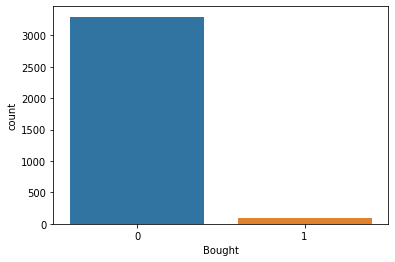

In [8]:
sns.countplot(x = 'Bought',data = train)

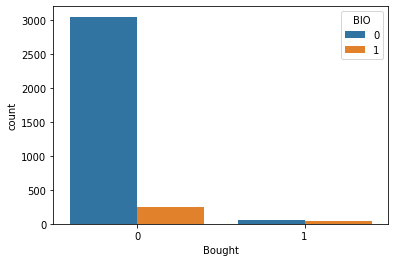

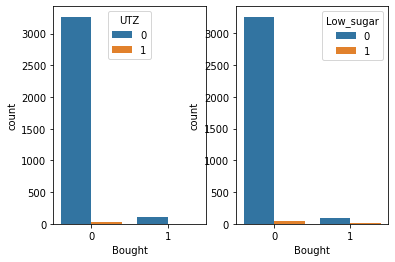

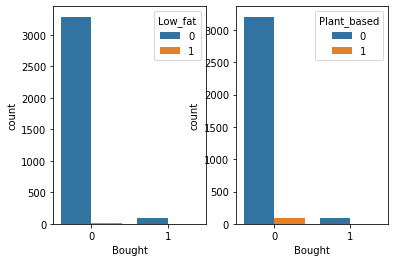

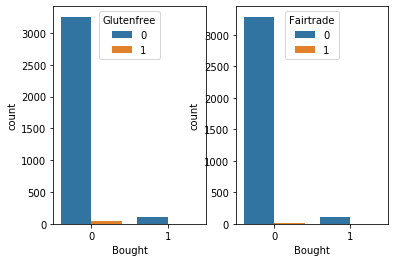

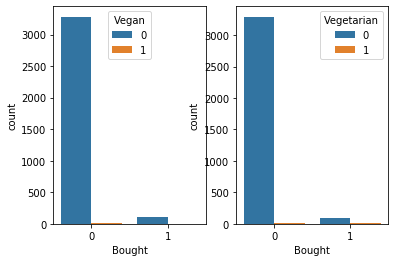

In [9]:
cat_1 = 'BIO'
cat_2 = 'UTZ'
cat_3 = 'Low_sugar'
cat_4 = 'Low_fat'
cat_5 = 'Plant_based'
cat_6 = 'Glutenfree'
cat_7 = 'Fairtrade'
cat_8 = 'Vegan'
cat_9 = 'Vegetarian'


sns.countplot(x = 'Bought',hue = cat_1, data = train)

fig, ax =plt.subplots(1,2)
sns.countplot(x = 'Bought',hue = cat_2, data = train, ax=ax[0])
sns.countplot(x = 'Bought',hue = cat_3, data = train, ax=ax[1])
fig.show()

fig, ax =plt.subplots(1,2)
sns.countplot(x = 'Bought',hue = cat_4, data = train, ax=ax[0])
sns.countplot(x = 'Bought',hue = cat_5, data = train, ax=ax[1])
fig.show()

fig, ax =plt.subplots(1,2)
sns.countplot(x = 'Bought',hue = cat_6, data = train, ax=ax[0])
sns.countplot(x = 'Bought',hue = cat_7, data = train, ax=ax[1])
fig.show()


fig, ax =plt.subplots(1,2)
sns.countplot(x = 'Bought',hue = cat_8, data = train, ax=ax[0])
sns.countplot(x = 'Bought',hue = cat_9, data = train, ax=ax[1])
fig.show()

Based on the plots above we can say that:
- Biological products are the most frequenttly bought products compared to the other labels. 
- The majority of the dataset does not include any label 
- Biological and plant based products are the most frequentely labelled products in general

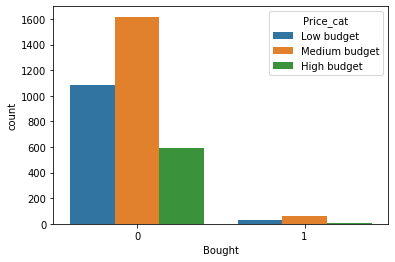

In [10]:
sns.countplot(x = 'Bought',hue = 'Price_cat',data = train)

The price category indicates whether a product is labelled as "Low budget" (< 1.25 euros), "Medium budget" (1.25 - 2.25 euros) or "High budget"(> 2.25 euros). Based on the plot above we can say that the most frequentely bought products are classified as medium budget and the distribution of high budget products is very low. 

### Check missing values

In [11]:
print("Check missing values in train set")
print(train.isnull().sum())
print("---------------------")
print("Check missing values in test set")
print(test.isnull().sum())

Check missing values in train set
Unnamed: 0     0
Title          0
Nutri-Score    0
Description    0
Price          0
Price_cat      0
BIO            0
Low_sugar      0
Low_fat        0
Plant_based    0
Glutenfree     0
Fairtrade      0
UTZ            0
Vegan          0
Vegetarian     0
Bought         0
dtype: int64
---------------------
Check missing values in test set
Unnamed: 0     0
Title          0
Nutri-Score    0
Description    0
Price          0
Price_cat      0
BIO            0
Low_sugar      0
Low_fat        0
Plant_based    0
Glutenfree     0
Fairtrade      0
UTZ            0
Vegan          0
Vegetarian     0
dtype: int64


The table above shows no data is missing.

### Categorical variables

In [12]:
def create_dummies(df,column_name):
    dummies = pd.get_dummies(df[column_name],prefix=column_name)
    df = pd.concat([df,dummies],axis=1)
    return df

for column in ["Nutri-Score", "Price_cat"]:
    train = create_dummies(train,column)
    test = create_dummies(test,column)

### Drop unnecessary columns

In [13]:
# train.drop(['Title','Nutri-Score','Price_cat', 
#           'Plant_based', 'Glutenfree', 'Fairtrade', 'UTZ', 'Vegan', 'Vegetarian'],inplace=True,axis=1)
# test.drop(['Title','Nutri-Score','Price_cat',
#           'Plant_based', 'Glutenfree', 'Fairtrade', 'UTZ', 'Vegan', 'Vegetarian'],inplace=True,axis=1)

### Logistic Regression

In [14]:
lr = LogisticRegression()
columns = ['BIO', 
          'Plant_based', 'Glutenfree', 'Fairtrade', 'UTZ', 'Vegan', 'Vegetarian'
          ]

lr.fit(train[columns], train["Bought"])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Validation set

In [15]:
X = train[columns]
y = train['Bought']

train_X, val_X, train_y, val_y = train_test_split(
    X, y, test_size=0.20,random_state=0)

### Predictions and accuracy

In [16]:
lr = LogisticRegression()
lr.fit(train_X, train_y)
predictions = lr.predict(val_X)
accuracy = accuracy_score(val_y, predictions)
print(accuracy)
from sklearn.metrics import classification_report
print(classification_report(val_y,predictions))

0.9735294117647059
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       662
           1       0.00      0.00      0.00        18

    accuracy                           0.97       680
   macro avg       0.49      0.50      0.49       680
weighted avg       0.95      0.97      0.96       680



### Cross validations for error measurement

In [17]:
lr = LogisticRegression()
scores = cross_val_score(lr, X, y, cv=10)
scores.sort()
accuracy = scores.mean()

print(scores)
print(accuracy)

[0.97050147 0.97058824 0.97058824 0.97058824 0.97058824 0.97058824
 0.97058824 0.97058824 0.97058824 0.97058824]
0.9705795592573313


### Predictions of test set

In [18]:
lr = LogisticRegression()
lr.fit(X,y)
predictions_test = lr.predict(test[columns])

### Bought products

In [19]:
bought_df = pd.DataFrame({'Title' : test['Title'],
                              'Bought':predictions_test})
bought_df.head()

,Title,Bought
0,AH Maaltijdsalade gado gado,0
1,AH Vegetarische rode curry,0
2,AH Texmex,0
3,AH Biologisch bananen,0
4,AH Biologisch Komkommer,0


In [20]:
bought_df.to_csv("bought.csv",index=False)